## Practical Work 3

For this practical work, the trainees will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

##### Please notice that we will apply these algorithm to single variable LR.
##### Only batch variant is required.

#### Import numpy, matplotlib.pyplot and make it inline

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that:
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [ ]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [ ]:
a=-1
b=2
y=a*X+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

### Plot X vs. y

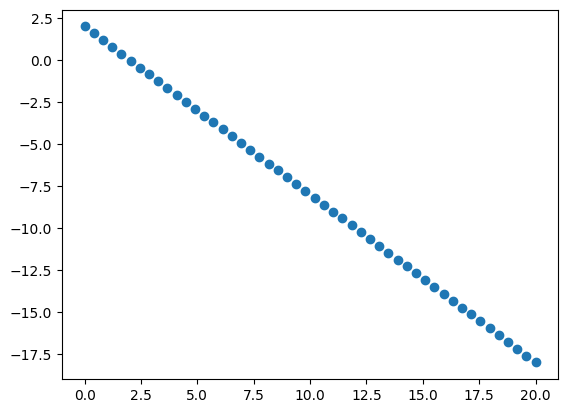

In [ ]:
plt.scatter(X,y)

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Choose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)

In [ ]:
def GD(x,y,alpha,max_itr,gradient_tolerance,cost_tolerance):
  theta_1 = 0
  theta_0 = 0
  cost_array = []
  w_array = []
  w_vector = []
  y_predict_val = []
  errors = []
  count = 0

  for i in range(max_itr):
    w_vector = [[theta_0],[theta_1]]
    y_predict = theta_0 + theta_1*x
    y_predict_val.append(y_predict)
    error = y_predict - y
    errors.append(error)
    j = 1/(2*len(y)) * np.sum(error**2)
    cost_array.append(j)
    w_array.append([[theta_0],[theta_1]])
    gradient_theta_0 = 1/len(y) * np.sum(error)
    gradient_theta_1 = 1/len(y)* np.dot(error,X)
    theta_0 = theta_0 - (alpha*gradient_theta_0)
    theta_1 = theta_1 - (alpha*gradient_theta_1)
    gradient_vector = np.array([[gradient_theta_0],[gradient_theta_1]])
    norm_gradient = np.linalg.norm(gradient_vector)


    print('****************** Iteration '+str(i)+' ********************')
    print('h(x): '+ str(y_predict))
    print('')
    print('')
    print('Error vector '+ str(error))
    print('')
    print('')
    print('j= '+ str(j))
    print('')
    print('')
    print('Gradient Vector: '+str(gradient_vector))
    print('')
    print('')
    print('Gradient Vector Norm: '+str(norm_gradient))
    print('')
    print('')
    print('theta_0: '+str(theta_0))
    print('theta_1: '+str(theta_1))

    if norm_gradient<gradient_tolerance :
      break
    if i>0:
      cost_conv = abs(cost_array[-1]-cost_array[-2])

      if cost_conv < cost_tolerance and count>10:
        break

      elif cost_conv < cost_tolerance and count <= 10:
        count+=1
      else:
        count = 0
  return w_array,cost_array,y_predict_val,w_vector,y_predict

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [ ]:
w_array,cost_array,y_predict_val,w_vector,y_predict = GD(X,y,0.0005,300,0.001,0.001)

****************** Iteration 0 ********************
h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


Error vector [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]


j= 49.34693877551021


Gradient Vector: [[  8.        ]
 [114.69387755]]


Gradient Vector Norm: 114.97254258164628


theta_0: -0.004
theta_1: -0.0573469387755102

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

theta_0_new : -0.004
theta_1_new : -0.05734693

In [ ]:
r2_score(y,y_predict)

0.9689463617260344

r2_score: 0.9686158031920962


##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

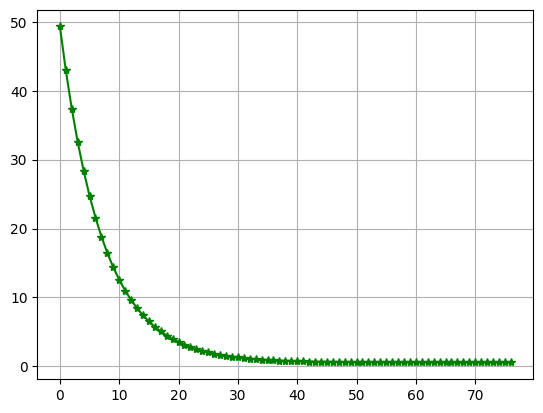

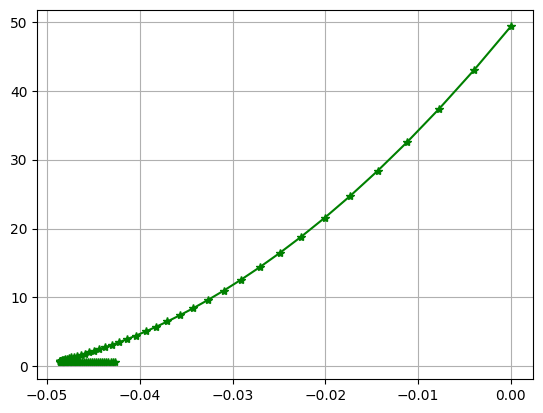

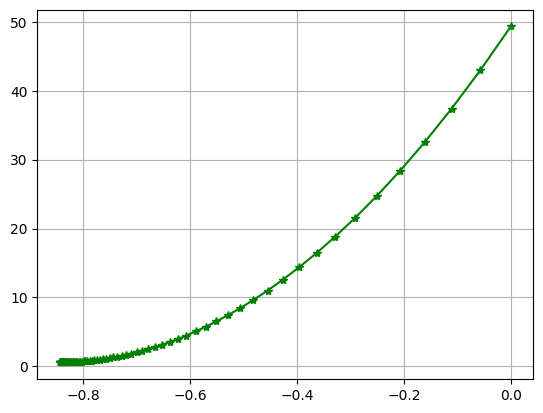

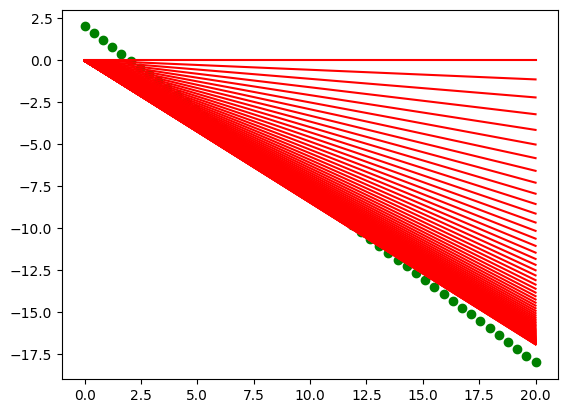

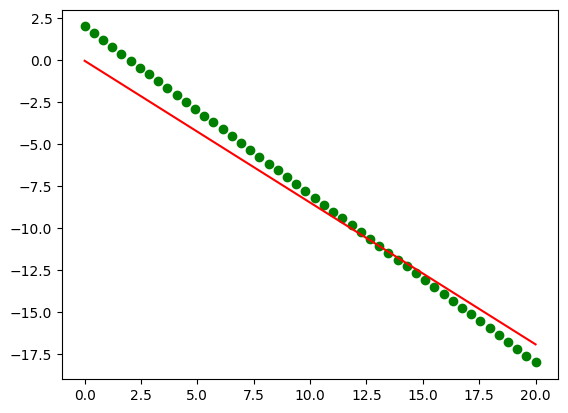

In [ ]:
plt.plot(np.arange(len(cost_array)),cost_array,marker='*',color = 'green')
plt.grid(True)
plt.show();

w_array=np.array(w_array)

plt.plot(w_array[:,0],cost_array,marker='*',color = 'green')
plt.grid(True);
plt.show();

plt.plot(w_array[:,1],cost_array,marker='*',color = 'green')
plt.grid(True);
plt.show();

plt.scatter(X,y,color = 'green')
for i in y_predict_val:
  plt.plot(X,i,color='red')
plt.show();

plt.scatter(X,y,color = 'green')
plt.plot(X,y_predict,color='red')
plt.show();

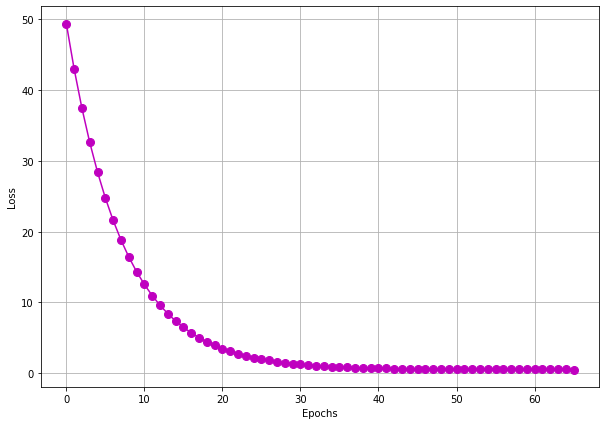

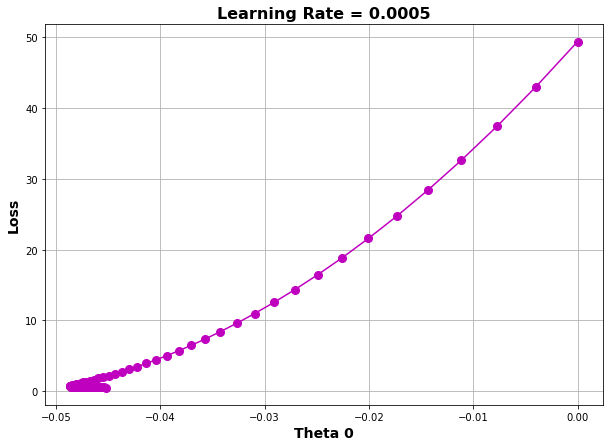

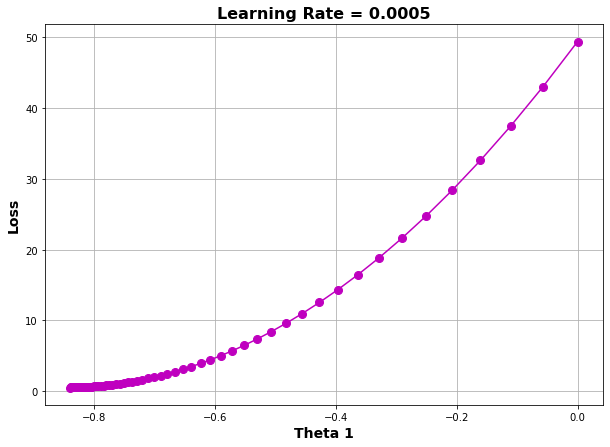

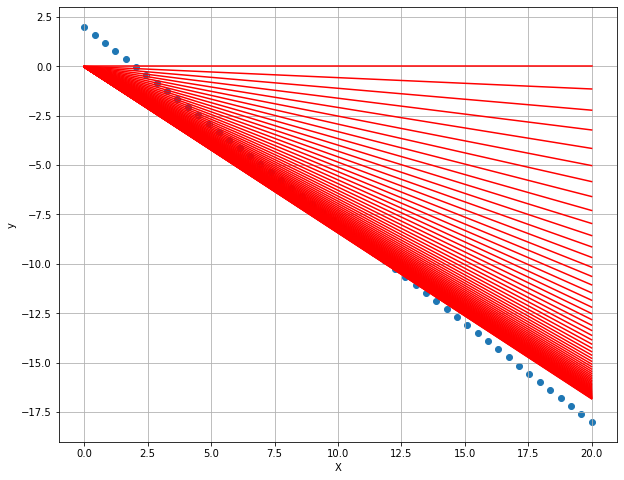

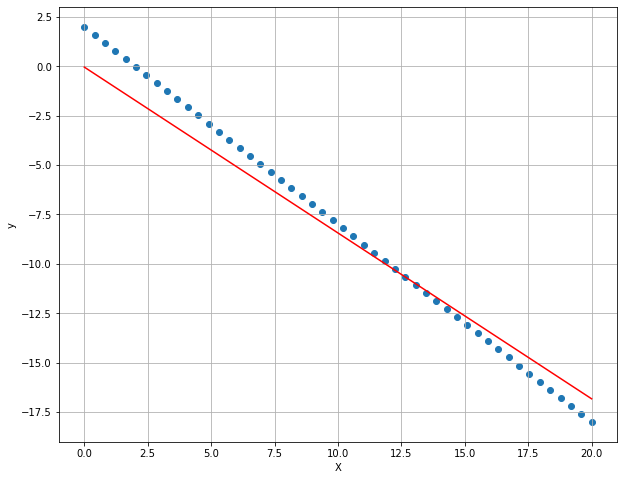

### Update your Batch GD for single variable  implementation (Batch variant) to be Momentum-Based GD and check your results

#### γ takes values between 0 and 1.

In [ ]:
def GD_with_momentum(x,y,alpha,max_itr,gradient_tolerance,cost_tolerance,gama):
  theta_1 = 0
  theta_0 = 0
  cost_array = []
  w_array = []
  w_vector = []
  y_predict_val = []
  errors = []
  count = 0
  theta0_v0=0
  theta1_v1=0

  for i in range(max_itr):
    w_vector = [[theta_0],[theta_1]]
    y_predict = theta_0 + theta_1*x
    y_predict_val.append(y_predict)
    error = y_predict - y
    errors.append(error)
    j = 1/(2*len(y)) * np.sum(error**2)
    cost_array.append(j)
    w_array.append([[theta_0],[theta_1]])
    gradient_theta_0 = 1/len(y) * np.sum(error)
    gradient_theta_1 = 1/len(y)* np.dot(error,X)
    theta0_v0 = gama*theta0_v0 + alpha*gradient_theta_0
    theta1_v1 = gama*theta1_v1 + alpha*gradient_theta_1
    theta_0 = theta_0 - theta0_v0
    theta_1 = theta_1 - theta1_v1
    gradient_vector = np.array([[gradient_theta_0],[gradient_theta_1]])
    norm_gradient = np.linalg.norm(gradient_vector)


    print('****************** Iteration '+str(i)+' ********************')
    print('h(x): '+ str(y_predict))
    print('')
    print('')
    print('Error vector '+ str(error))
    print('')
    print('')
    print('j= '+ str(j))
    print('')
    print('')
    print('Gradient Vector: '+str(gradient_vector))
    print('')
    print('')
    print('Gradient Vector Norm: '+str(norm_gradient))
    print('')
    print('')
    print('theta_0: '+str(theta_0))
    print('theta_1: '+str(theta_1))

    if norm_gradient<gradient_tolerance :
      break
    if i>0:
      cost_conv = abs(cost_array[-1]-cost_array[-2])

      if cost_conv < cost_tolerance and count>10:
        break

      elif cost_conv < cost_tolerance and count <= 10:
        count+=1
      else:
        count = 0
  return w_array,cost_array,y_predict_val,w_vector,y_predict

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005, gamma=0.5 and max. iterations = 300.

In [ ]:
w_array,cost_array,y_predict_val,w_vector,y_predict = GD_with_momentum(X,y,0.0005,300,0.001,0.001,0.5)

****************** Iteration 0 ********************
h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


Error vector [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]


j= 49.34693877551021


Gradient Vector: [[  8.        ]
 [114.69387755]]


Gradient Vector Norm: 114.97254258164628


theta_0: -0.004
theta_1: -0.0573469387755102

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

v_0 : 0.004
v_1 : 0.05734693877551021

theta_0

In [ ]:
r2_score(y,y_predict)

0.9690430948291003

r2_score: 0.9687892837396442


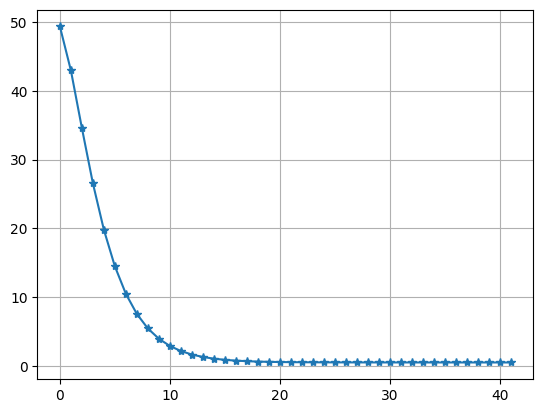

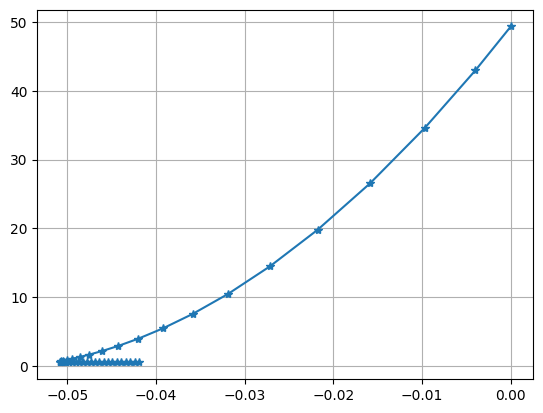

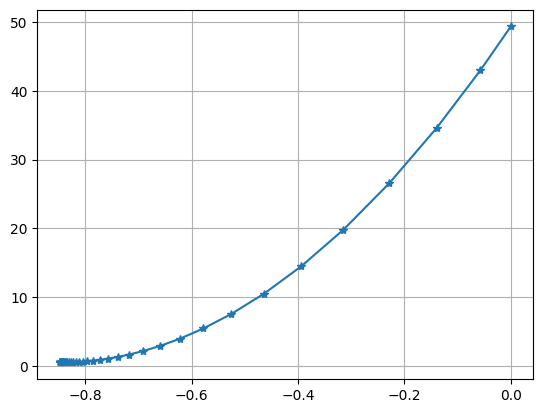

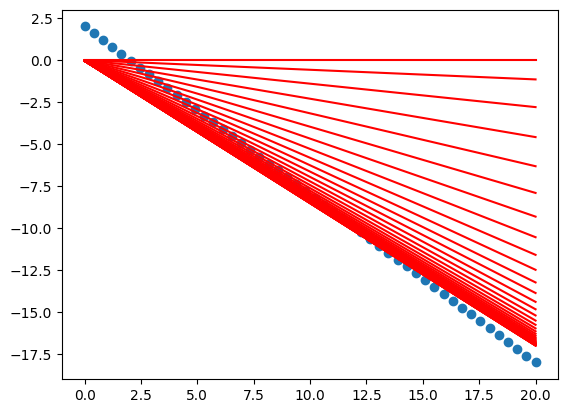

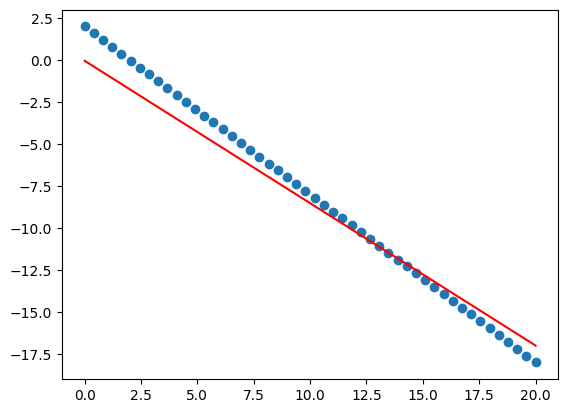

In [ ]:
plt.plot(np.arange(len(cost_array)),cost_array,marker='*')
plt.grid(True)
plt.show();

w_array=np.array(w_array)

plt.plot(w_array[:,0],cost_array,marker='*')
plt.grid(True);
plt.show();

plt.plot(w_array[:,1],cost_array,marker='*')
plt.grid(True);
plt.show();

plt.scatter(X,y)
for i in y_predict_val:
  plt.plot(X,i,color='red')
plt.show();

plt.scatter(X,y)
plt.plot(X,y_predict,color='red')
plt.show();

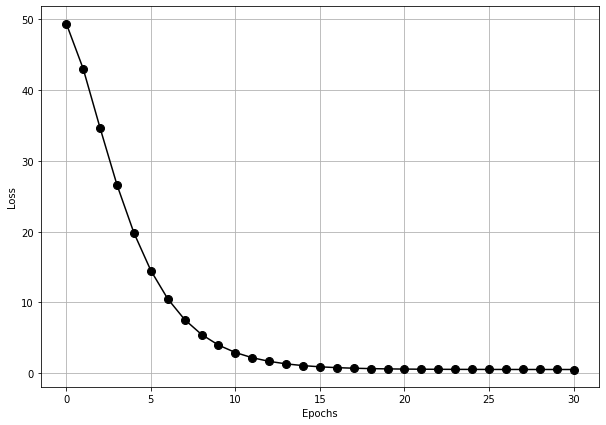

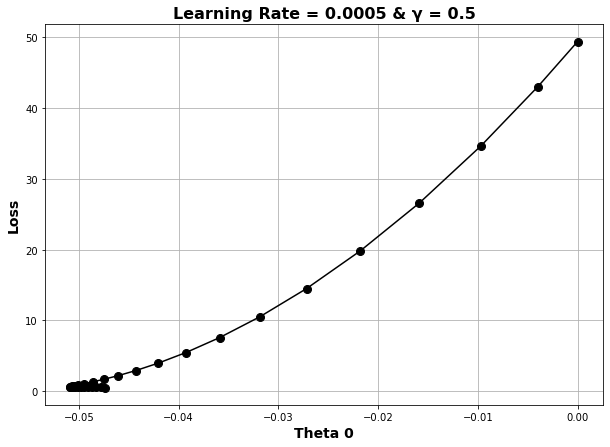

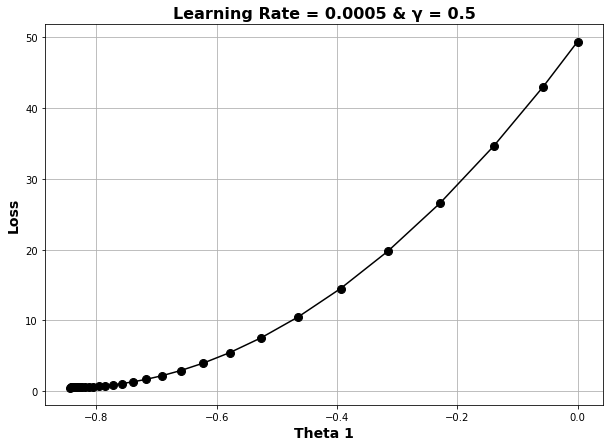

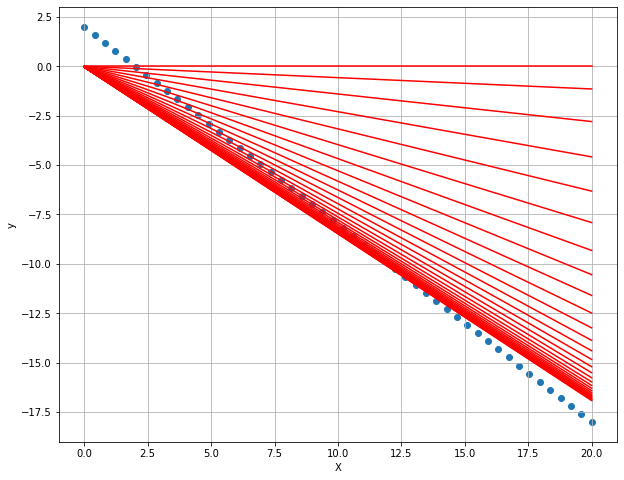

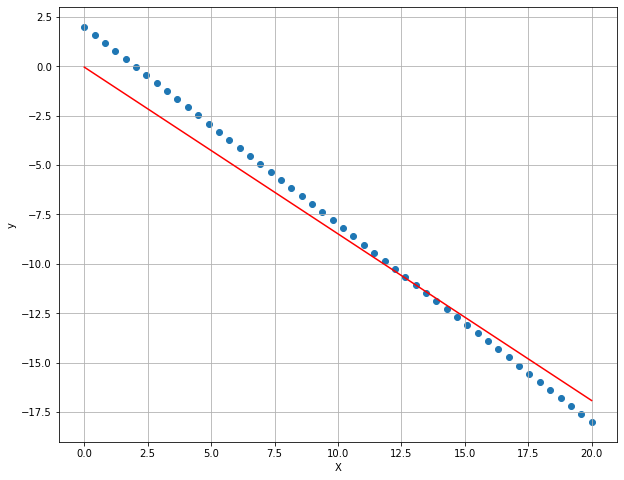

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero.
#### Try momentum = 0

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [ ]:
w_array,cost_array,y_predict_val,w_vector,y_predict = GD_with_momentum(X,y,0.0005,300,0.001,0.001,0.9)

Streaming output truncated to the last 5000 lines.
 -4.97498376e+00 -5.22342499e+00 -5.47186623e+00 -5.72030746e+00
 -5.96874869e+00 -6.21718993e+00 -6.46563116e+00 -6.71407239e+00
 -6.96251362e+00 -7.21095486e+00 -7.45939609e+00 -7.70783732e+00
 -7.95627855e+00 -8.20471979e+00 -8.45316102e+00 -8.70160225e+00
 -8.95004349e+00 -9.19848472e+00 -9.44692595e+00 -9.69536718e+00
 -9.94380842e+00 -1.01922496e+01 -1.04406909e+01 -1.06891321e+01
 -1.09375733e+01 -1.11860146e+01 -1.14344558e+01 -1.16828970e+01
 -1.19313383e+01 -1.21797795e+01]


Error vector [-2.00615911 -1.84643707 -1.68671504 -1.52699301 -1.36727098 -1.20754894
 -1.04782691 -0.88810488 -0.72838285 -0.56866081 -0.40893878 -0.24921675
 -0.08949472  0.07022732  0.22994935  0.38967138  0.54939341  0.70911545
  0.86883748  1.02855951  1.18828154  1.34800358  1.50772561  1.66744764
  1.82716968  1.98689171  2.14661374  2.30633577  2.46605781  2.62577984
  2.78550187  2.9452239   3.10494594  3.26466797  3.42439     3.58411203
  3.743

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

v_0 : 0.004
v_1 : 0.05734693877551021

theta_0

In [ ]:
r2_score(y,y_predict)

0.9785208737901984

r2_score 0.973589591111118


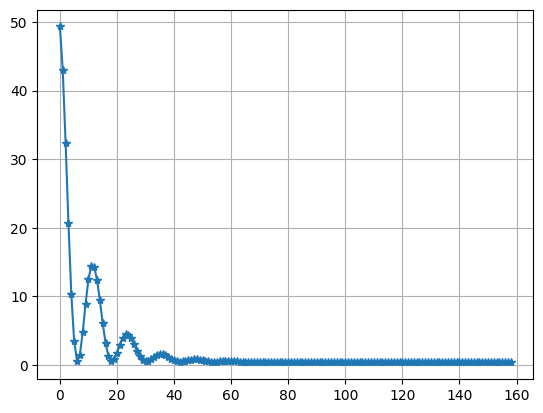

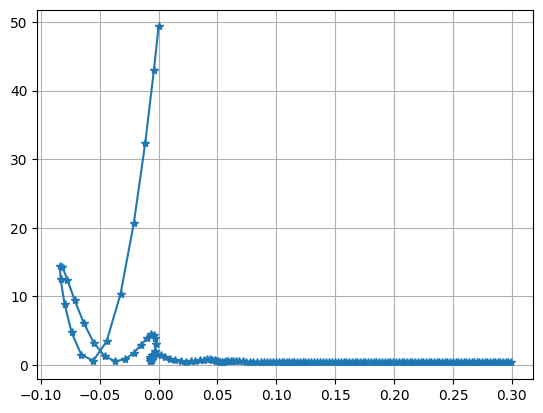

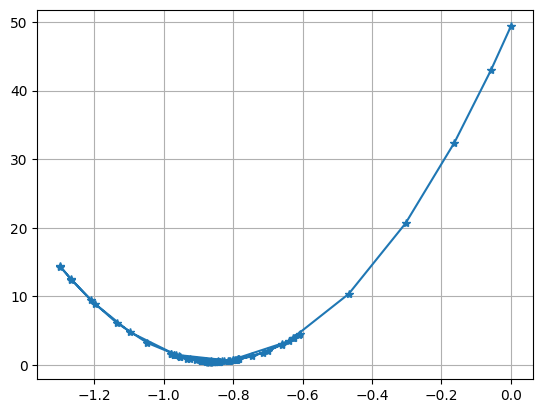

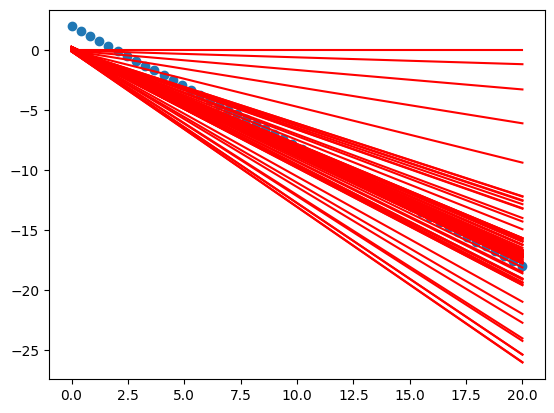

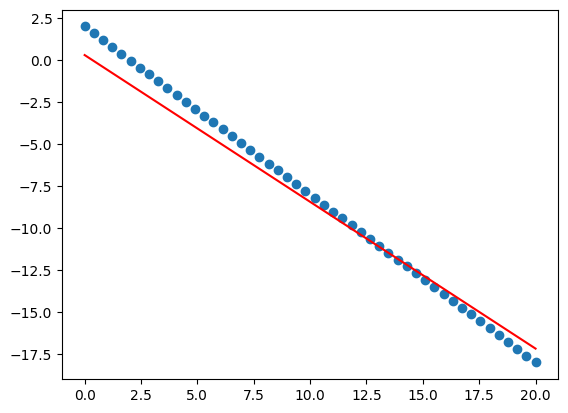

In [ ]:
plt.plot(np.arange(len(cost_array)),cost_array,marker='*')
plt.grid(True)
plt.show();

w_array=np.array(w_array)

plt.plot(w_array[:,0],cost_array,marker='*')
plt.grid(True);
plt.show();

plt.plot(w_array[:,1],cost_array,marker='*')
plt.grid(True);
plt.show();

plt.scatter(X,y)
for i in y_predict_val:
  plt.plot(X,i,color='red')
plt.show();

plt.scatter(X,y)
plt.plot(X,y_predict,color='red')
plt.show();

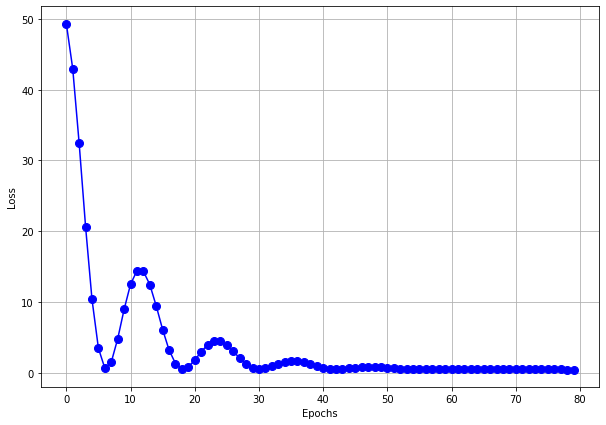

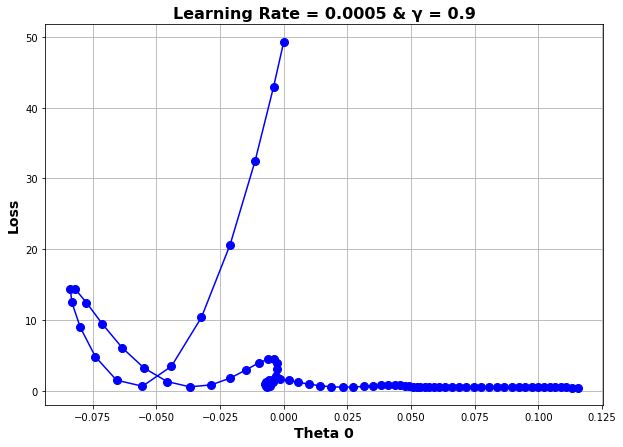

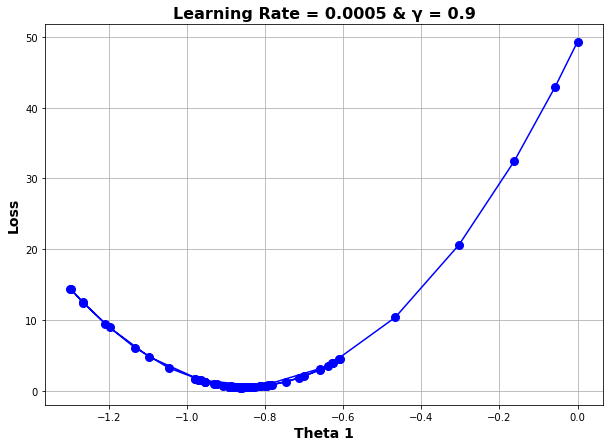

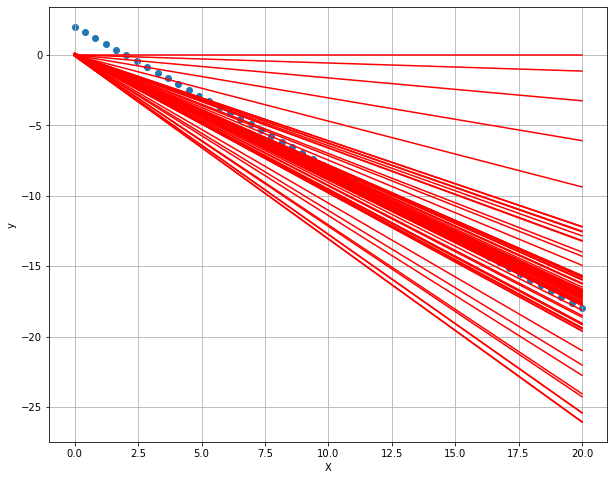

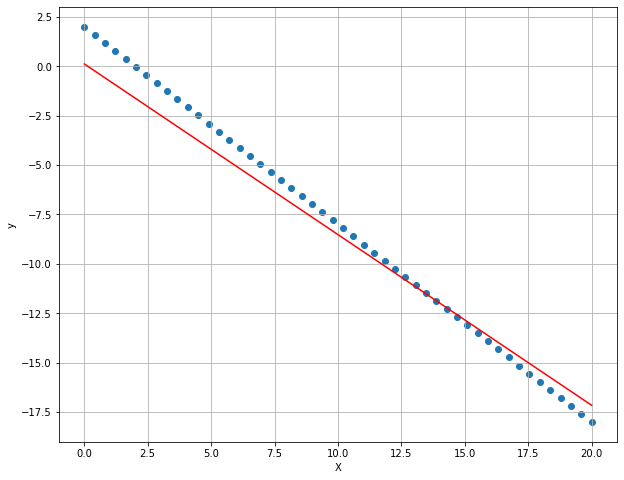

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [ ]:
w_array,cost_array,y_predict_val,w_vector,y_predict = GD_with_momentum(X,y,0.0005,300,0.001,0.001,0.89)

****************** Iteration 0 ********************
h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


Error vector [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]


j= 49.34693877551021


Gradient Vector: [[  8.        ]
 [114.69387755]]


Gradient Vector Norm: 114.97254258164628


theta_0: -0.004
theta_1: -0.0573469387755102

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

v_0 : 0.004
v_1 : 0.05734693877551021

theta_0

0.9761058926285757


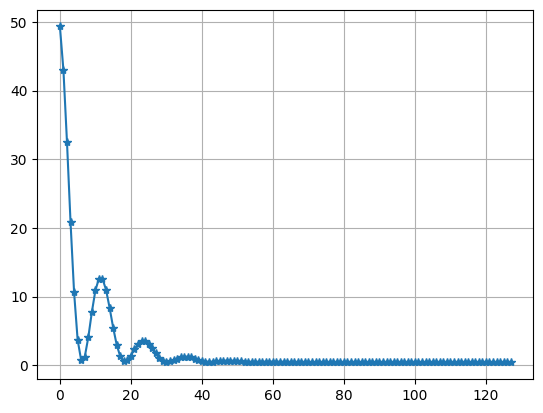

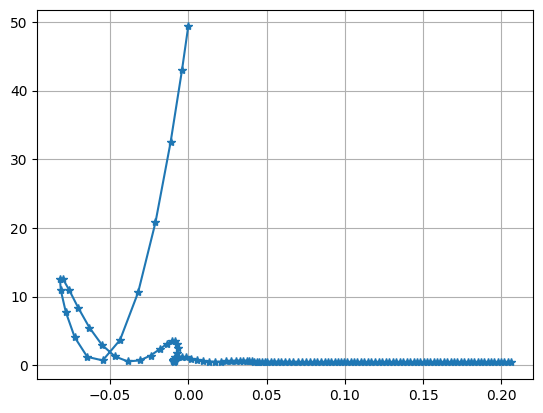

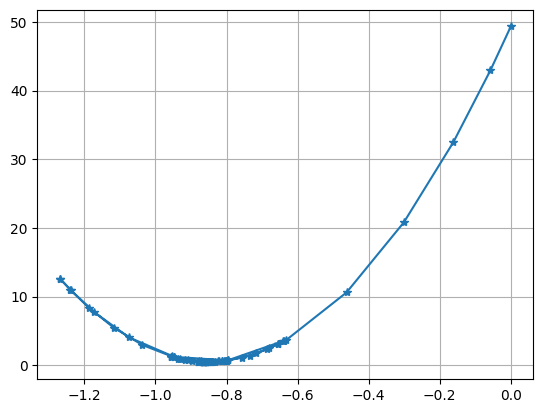

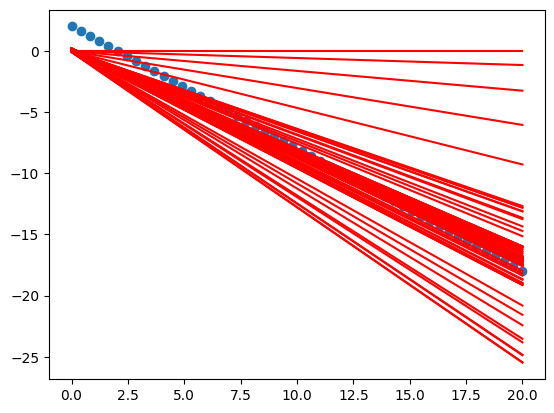

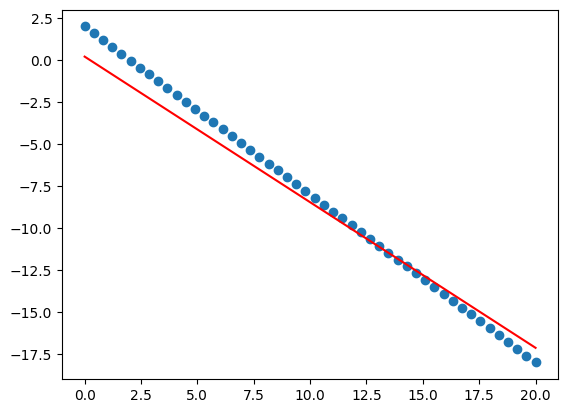

In [ ]:
print(r2_score(y,y_predict))
plt.plot(np.arange(len(cost_array)),cost_array,marker='*')
plt.grid(True)
plt.show();

w_array=np.array(w_array)

plt.plot(w_array[:,0],cost_array,marker='*')
plt.grid(True);
plt.show();

plt.plot(w_array[:,1],cost_array,marker='*')
plt.grid(True);
plt.show();

plt.scatter(X,y)
for i in y_predict_val:
  plt.plot(X,i,color='red')
plt.show();

plt.scatter(X,y)
plt.plot(X,y_predict,color='red')
plt.show();

r2 score =  0.972435565060376


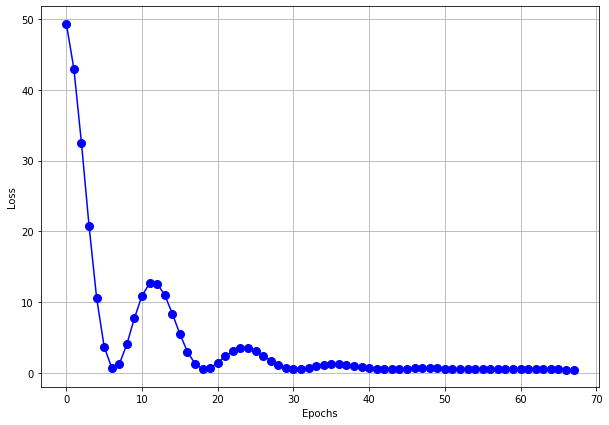

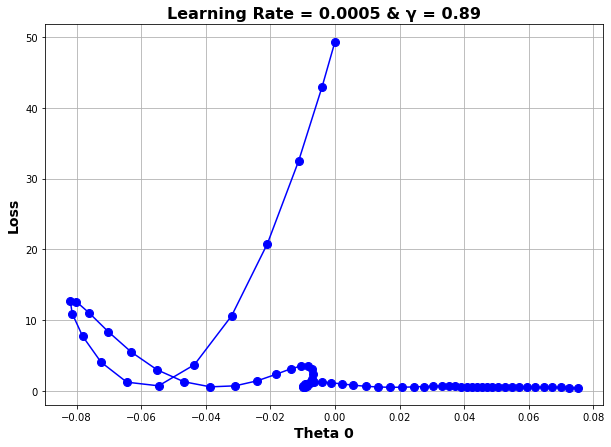

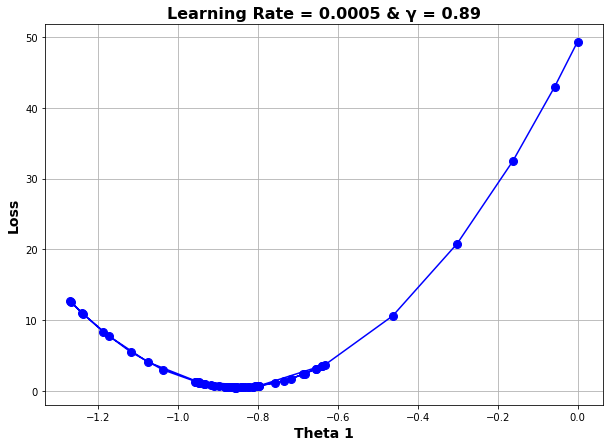

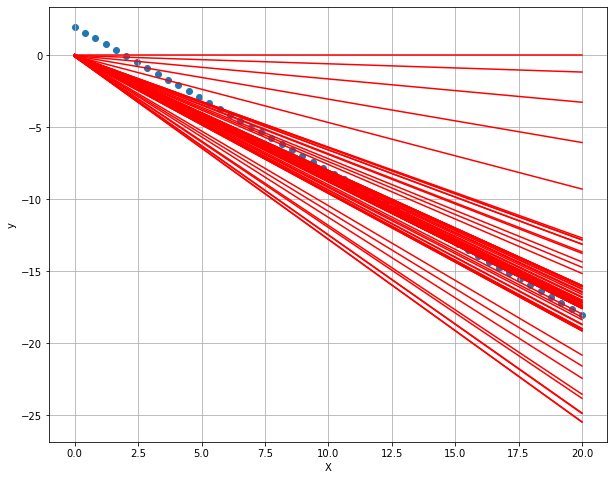

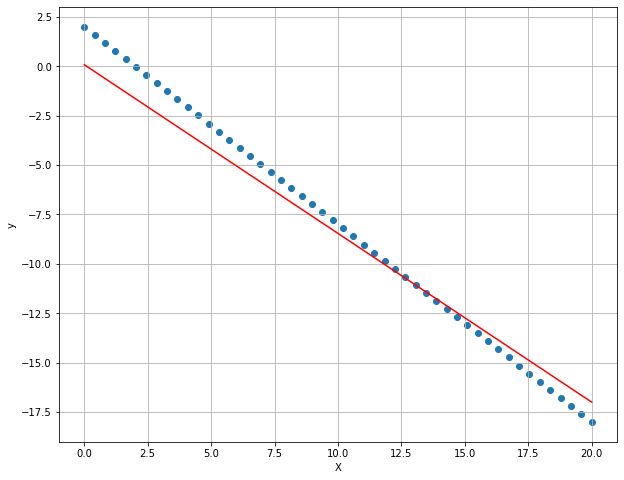

### Do not forget:

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero.
#### Try momentum = 0

### Update your Batch GD for one variable  implementation to be NAG and check your results

##### Very Important:
- <b><font color='red'> In order to calculate the gradient at theta_temp, you will need to calculate the prediction (hypothesis output) using theta_temp. </font></b>
##### h_temp = theta0_temp + theta1_temp * X

In [ ]:
def GD_NAG(X,y,alpha,max_itr,gradient_tolerance,cost_tolerance,gama):
  theta_1 = 0
  theta_0 = 0
  cost_array = []
  w_array = []
  w_vector = []
  y_predict_val = []
  errors = []
  count = 0
  theta0_v0=0
  theta1_v1=0

  for i in range(max_itr):

    w_vector = [[theta_0],[theta_1]]
    w_array.append([[theta_0],[theta_1]])

    theta0_temp = theta_0 - (gama*theta0_v0)
    theta1_temp = theta_1 - (gama*theta1_v1)


    y_predict = theta0_temp + theta1_temp*X
    y_predict_val.append(y_predict)

    error = y_predict - y
    errors.append(error)
    j = 1/(2*len(y)) * np.sum(error**2)
    cost_array.append(j)


    gradient_theta0_temp = 1/len(y) * np.sum(error)
    gradient_theta1_temp = 1/len(y)* np.dot(error,X)


    gradient_vector = np.array([[gradient_theta0_temp],[gradient_theta1_temp]])
    norm_gradient = np.linalg.norm(gradient_vector)


    print('****************** Iteration '+str(i)+' ********************')
    print('h(x): '+ str(y_predict))
    print('')
    print('')
    print('Error vector '+ str(error))
    print('')
    print('')
    print('j= '+ str(j))
    print('')
    print('')
    print('Gradient Vector: '+str(gradient_vector))
    print('')
    print('')
    print('Gradient Vector Norm: '+str(norm_gradient))
    print('')
    print('')
    print('theta_0: '+str(theta_0))
    print('theta_1: '+str(theta_1))

    if norm_gradient<gradient_tolerance :
      break
    if i>0:
      cost_conv = abs(cost_array[i-1]-cost_array[i])

      if cost_conv < cost_tolerance :
        print("converged")
        break
    theta0_v0 = gama*theta0_v0 + (alpha*gradient_theta0_temp)
    theta1_v1 = gama*theta1_v1 + (alpha*gradient_theta1_temp)

    theta_0 = theta_0 - theta0_v0
    theta_1 = theta_1 - theta1_v1
      #elif cost_conv < cost_tolerance and count <= 10:
        #count+=1
      #else:
        #count = 0
  return w_array,cost_array,y_predict_val,w_vector,y_predict

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [ ]:
w_array,cost_array,y_predict_val,w_vector,y_predict = GD_NAG(X,y,0.0005,300,0.001,0.001,0.9)

****************** Iteration 0 ********************
h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


Error vector [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]


j= 49.34693877551021


Gradient Vector: [[  8.        ]
 [114.69387755]]


Gradient Vector Norm: 114.97254258164628


theta_0: 0
theta_1: 0
****************** Ite

In [ ]:
r2_score(y,y_predict)

0.9710906447542837

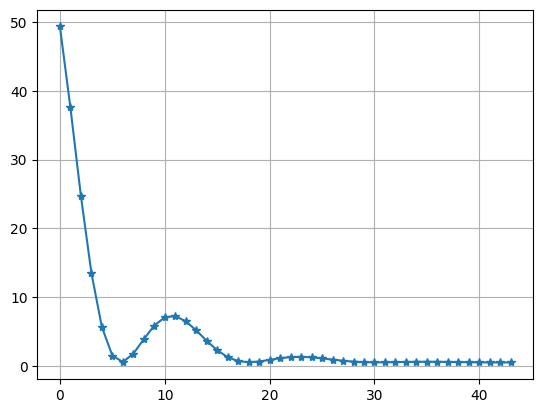

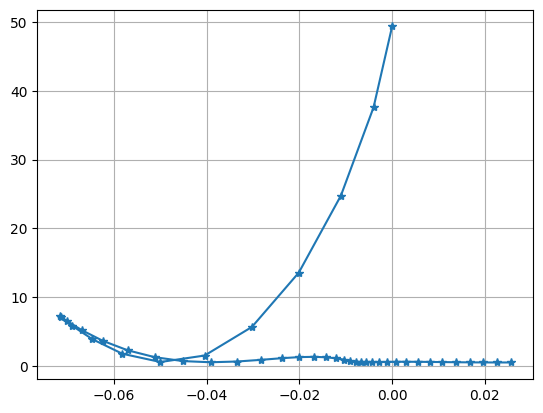

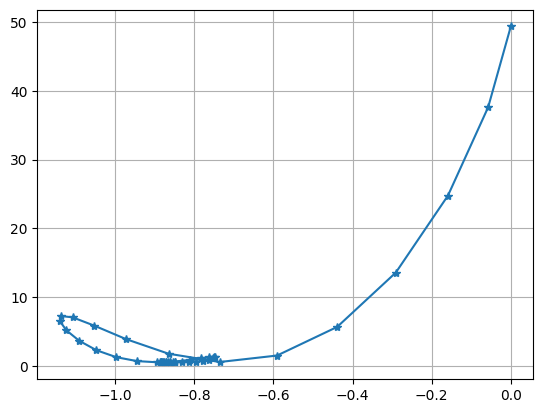

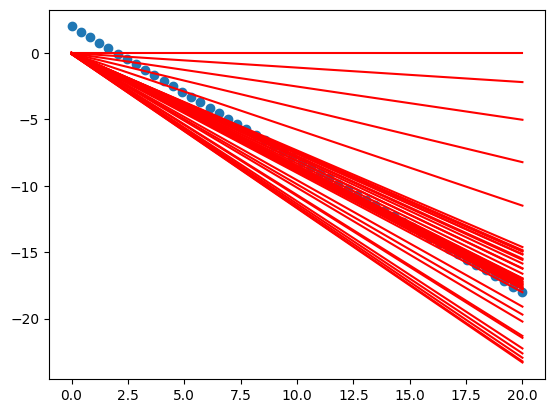

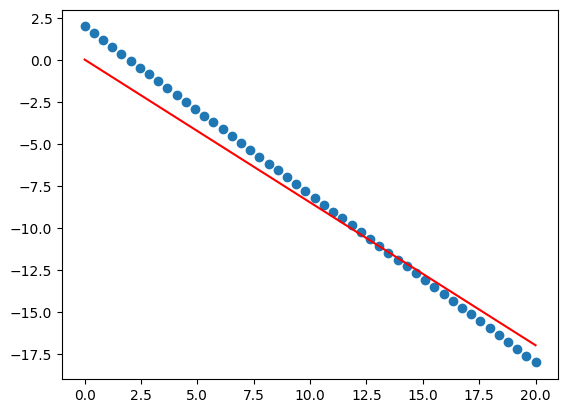

In [ ]:
plt.plot(np.arange(len(cost_array)),cost_array,marker='*')
plt.grid(True)
plt.show();

w_array=np.array(w_array)

plt.plot(w_array[:,0],cost_array,marker='*')
plt.grid(True);
plt.show();

plt.plot(w_array[:,1],cost_array,marker='*')
plt.grid(True);
plt.show();

plt.scatter(X,y)
for i in y_predict_val:
  plt.plot(X,i,color='red')
plt.show();

plt.scatter(X,y)
plt.plot(X,y_predict,color='red')
plt.show();

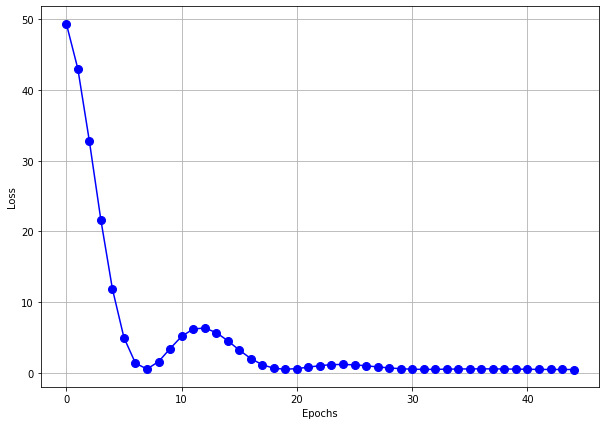

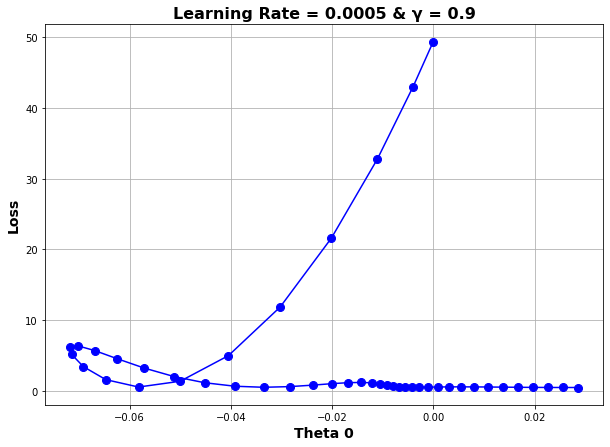

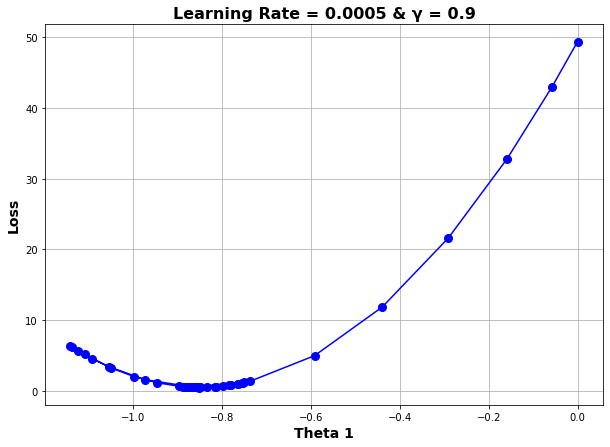

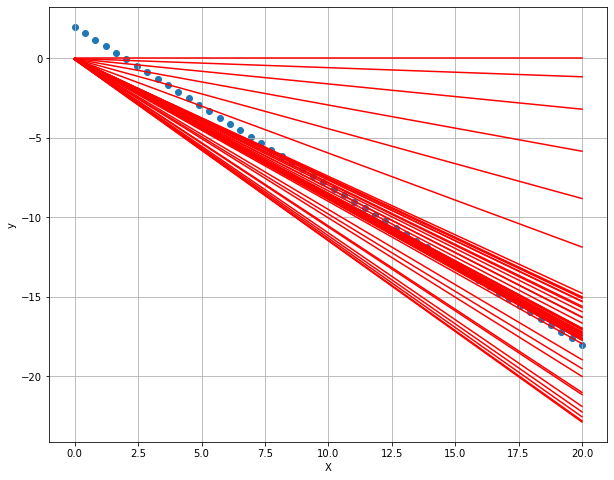

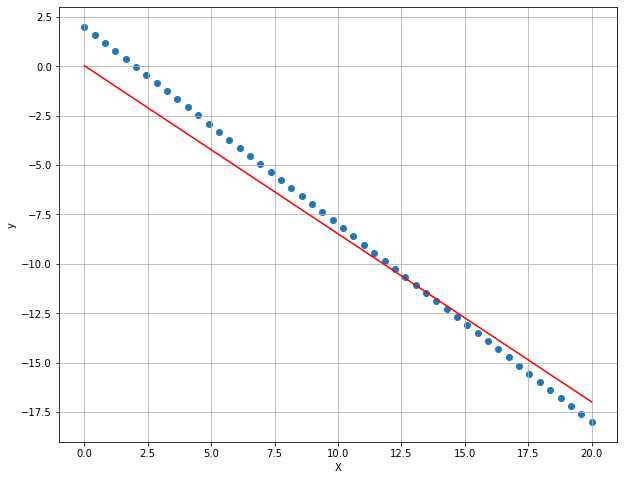

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [ ]:
w_array,cost_array,y_predict_val,w_vector,y_predict = GD_NAG(X,y,0.0005,300,0.001,0.001,0.89)

****************** Iteration 0 ********************
h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


Error vector [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]


j= 49.34693877551021


Gradient Vector: [[  8.        ]
 [114.69387755]]


Gradient Vector Norm: 114.97254258164628


theta_0: 0
theta_1: 0
****************** Ite

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

theta_0_new : -0.004
theta_1_new : -0.05734693

r2 score =  0.9699718983158406


In [ ]:
r2_score(y,y_predict)

0.969939562673322

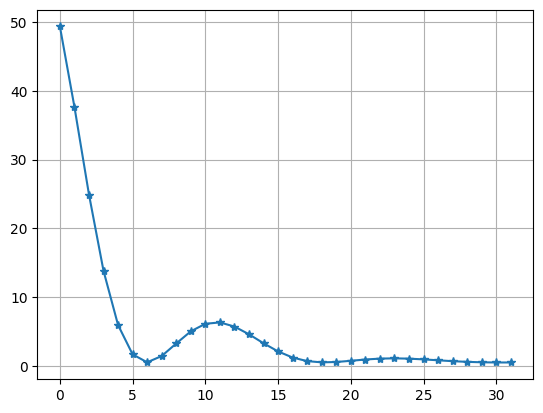

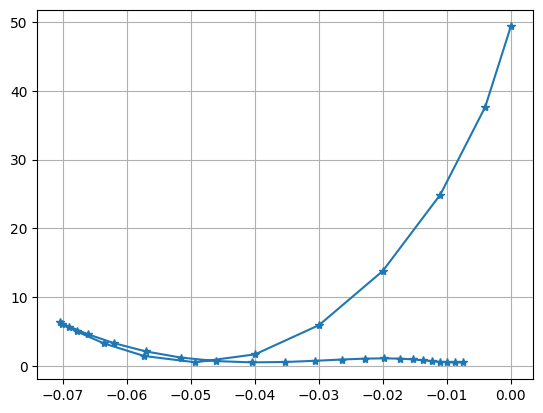

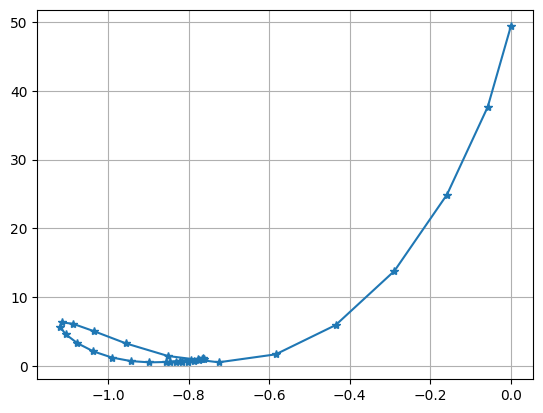

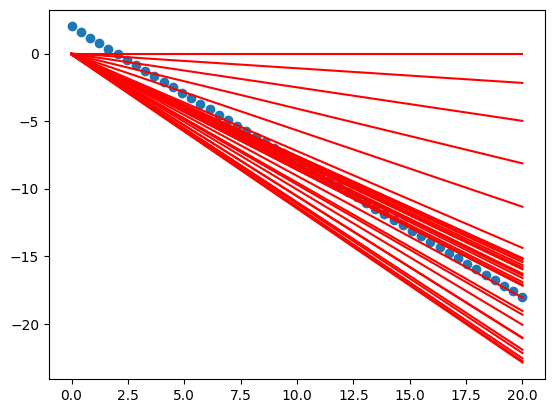

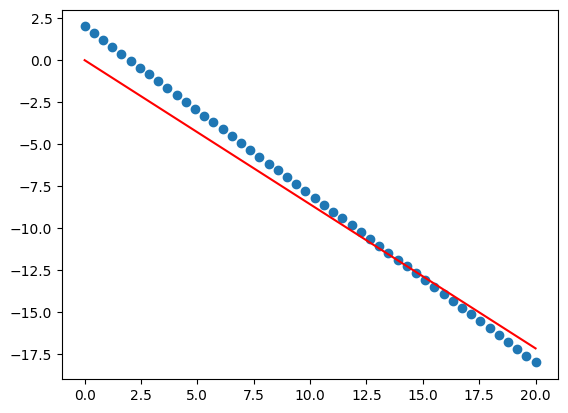

In [ ]:
plt.plot(np.arange(len(cost_array)),cost_array,marker='*')
plt.grid(True)
plt.show();

w_array=np.array(w_array)

plt.plot(w_array[:,0],cost_array,marker='*')
plt.grid(True);
plt.show();

plt.plot(w_array[:,1],cost_array,marker='*')
plt.grid(True);
plt.show();

plt.scatter(X,y)
for i in y_predict_val:
  plt.plot(X,i,color='red')
plt.show();

plt.scatter(X,y)
plt.plot(X,y_predict,color='red')
plt.show();

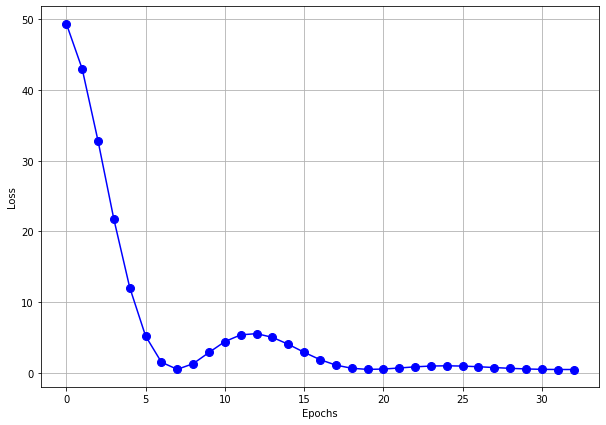

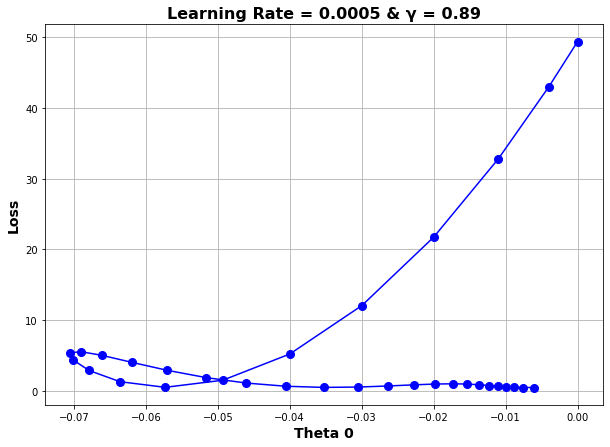

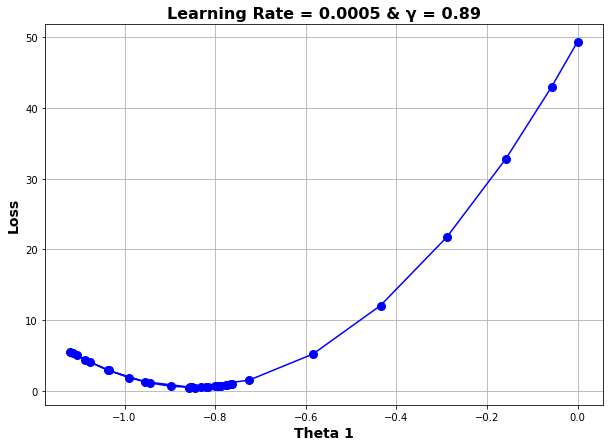

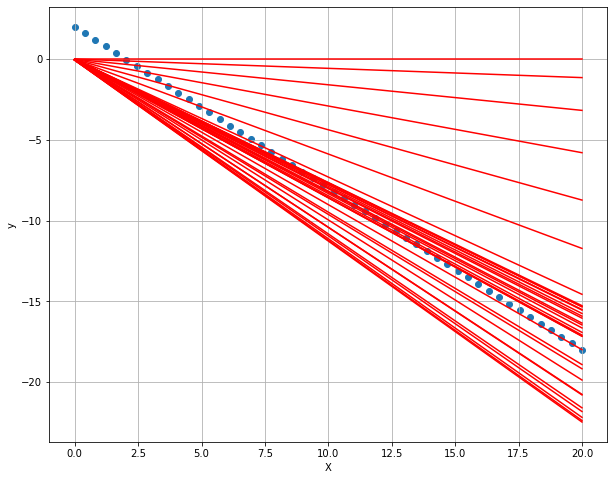

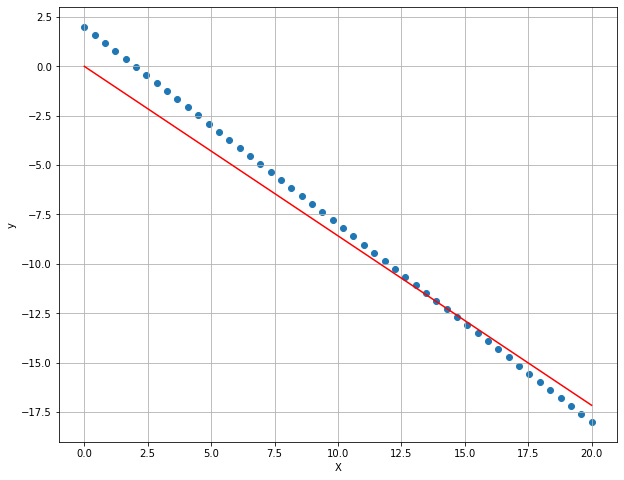